In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
from sklearn.preprocessing import StandardScaler


In [2]:
covid = pd.read_csv("covid_19_clean_complete.csv")
covid.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [3]:
covid["Date"] = pd.to_datetime(covid["Date"])

In [4]:
datewise = covid.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum","Active":"sum"})
print(datewise)

            Confirmed  Recovered  Deaths   Active
Date                                             
2020-01-22        555         28      17      510
2020-01-23        654         30      18      606
2020-01-24        941         36      26      879
2020-01-25       1434         39      42     1353
2020-01-26       2118         52      56     2010
...               ...        ...     ...      ...
2020-07-23   15510481    8710969  633506  6166006
2020-07-24   15791645    8939705  639650  6212290
2020-07-25   16047190    9158743  644517  6243930
2020-07-26   16251796    9293464  648621  6309711
2020-07-27   16480485    9468087  654036  6358362

[188 rows x 4 columns]


In [5]:
df = pd.DataFrame(datewise)
df['removed'] = df['Deaths'] + df['Recovered']
df

,Confirmed,Recovered,Deaths,Active,removed
Date,,,,,
2020-01-22,555,28,17,510,45
2020-01-23,654,30,18,606,48
2020-01-24,941,36,26,879,62
2020-01-25,1434,39,42,1353,81
2020-01-26,2118,52,56,2010,108
...,...,...,...,...,...
2020-07-23,15510481,8710969,633506,6166006,9344475
2020-07-24,15791645,8939705,639650,6212290,9579355
2020-07-25,16047190,9158743,644517,6243930,9803260


In [6]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))
print("Total number of Active hehesiuuuu around the world",(datewise["Active"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world 16480485
Total number of Recovered cases around the world 9468087
Total number of Death cases around the world 654036
Total number of Active cases around the world 6358362
Total number of Closed cases around the world 10122123
Total number of Active hehesiuuuu around the world 6358362


In [7]:
#Tn is the total number of people around the world 
Tn=40000000

In [8]:
df["Suceptible"]=Tn-df["Confirmed"]

In [9]:
df

,Confirmed,Recovered,Deaths,Active,removed,Suceptible
Date,,,,,,
2020-01-22,555,28,17,510,45,39999445
2020-01-23,654,30,18,606,48,39999346
2020-01-24,941,36,26,879,62,39999059
2020-01-25,1434,39,42,1353,81,39998566
2020-01-26,2118,52,56,2010,108,39997882
...,...,...,...,...,...,...
2020-07-23,15510481,8710969,633506,6166006,9344475,24489519
2020-07-24,15791645,8939705,639650,6212290,9579355,24208355
2020-07-25,16047190,9158743,644517,6243930,9803260,23952810


In [10]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=188, freq=None)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

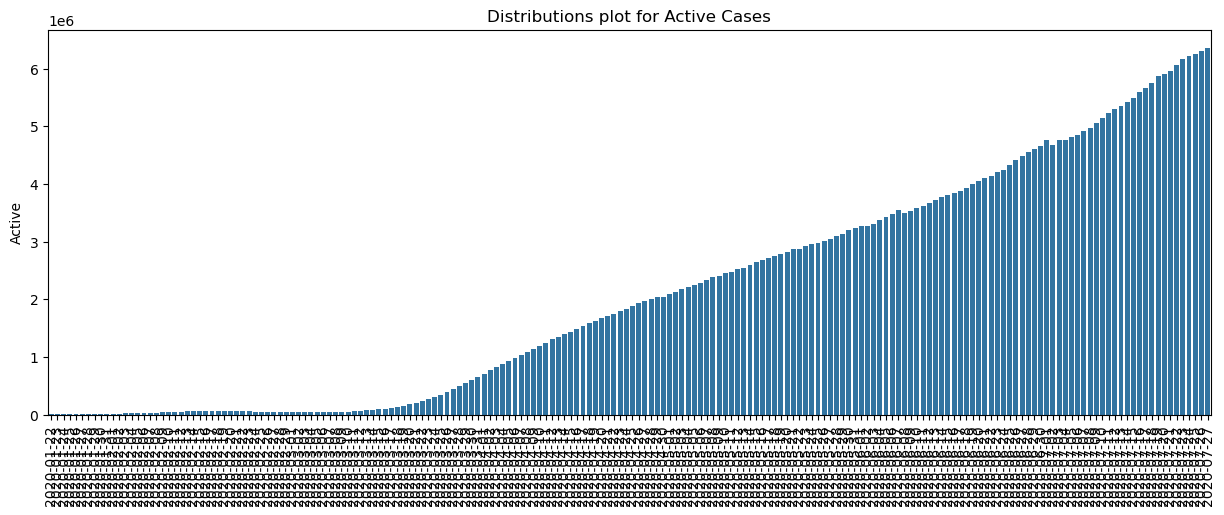

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.index.date,y=df["Active"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

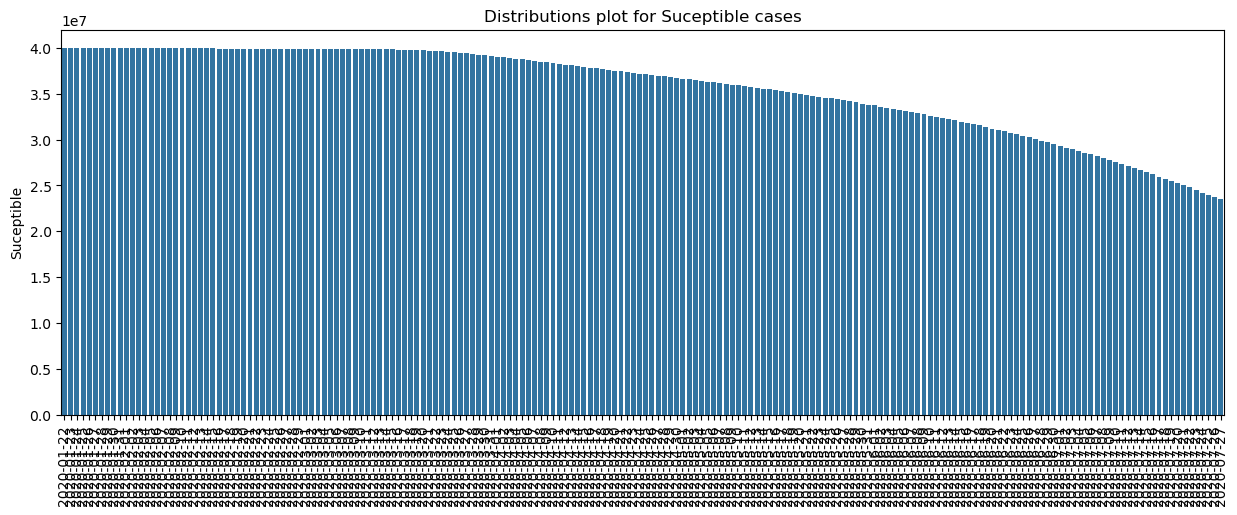

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.index.date,y=df["Suceptible"])
plt.title("Distributions plot for Suceptible cases")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

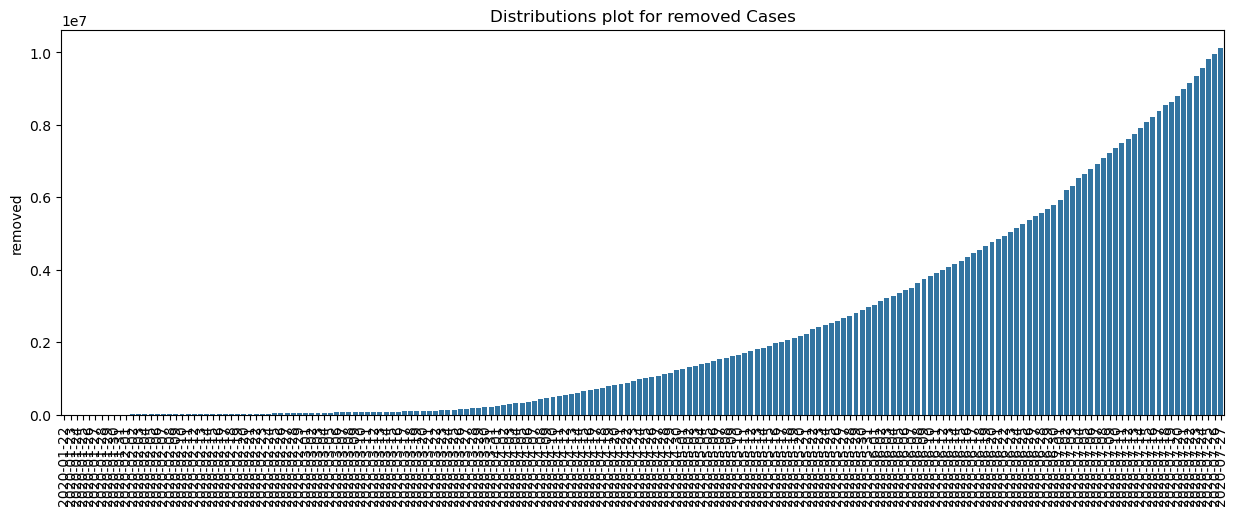

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.index.date,y=df["removed"])
plt.title("Distributions plot for removed Cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

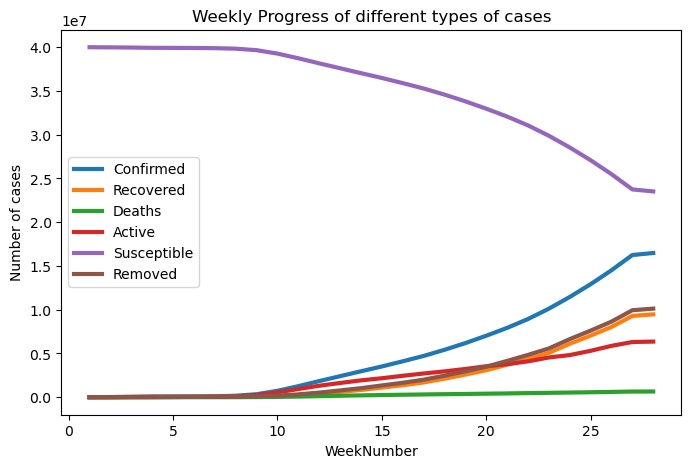

In [14]:
df["WeekofYear"] =df.index.to_series().dt.isocalendar().week
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
weekwise_suceptible=[]
weekwise_removed=[]
weekwise_active=[]
w = 1
for i in list(df["WeekofYear"].unique()):
    weekwise_confirmed.append(df[df["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(df[df["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(df[df["WeekofYear"]==i]["Deaths"].iloc[-1])
    weekwise_active.append(df[df["WeekofYear"]==i]["Active"].iloc[-1])
    weekwise_suceptible.append(df[df["WeekofYear"]==i]["Suceptible"].iloc[-1])
    weekwise_removed.append(df[df["WeekofYear"]==i]["removed"].iloc[-1])

    
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
legend_labels = ['Confirmed', 'Recovered', 'Deaths', 'Active', 'Susceptible', 'Removed']

plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth =3)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.plot(week_num,weekwise_active,linewidth = 3)
plt.plot(week_num,weekwise_suceptible,linewidth = 3)

plt.plot(week_num,weekwise_removed,linewidth = 3)
plt.legend(legend_labels)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

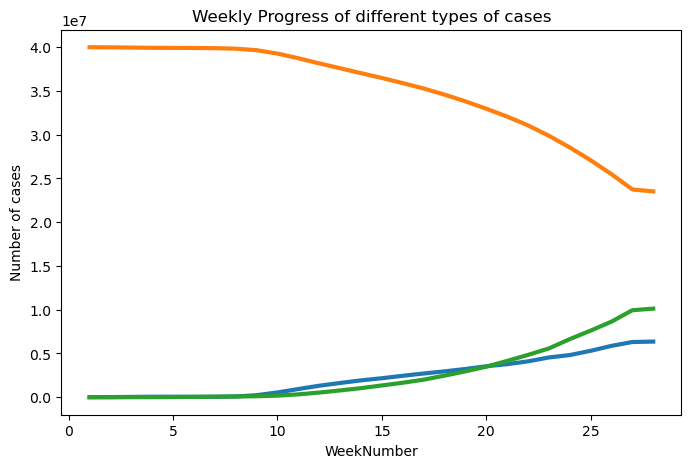

In [15]:

plt.figure(figsize=(8,5))

plt.plot(week_num,weekwise_active,linewidth = 3)
plt.plot(week_num,weekwise_suceptible,linewidth = 3)

plt.plot(week_num,weekwise_removed,linewidth = 3)

plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

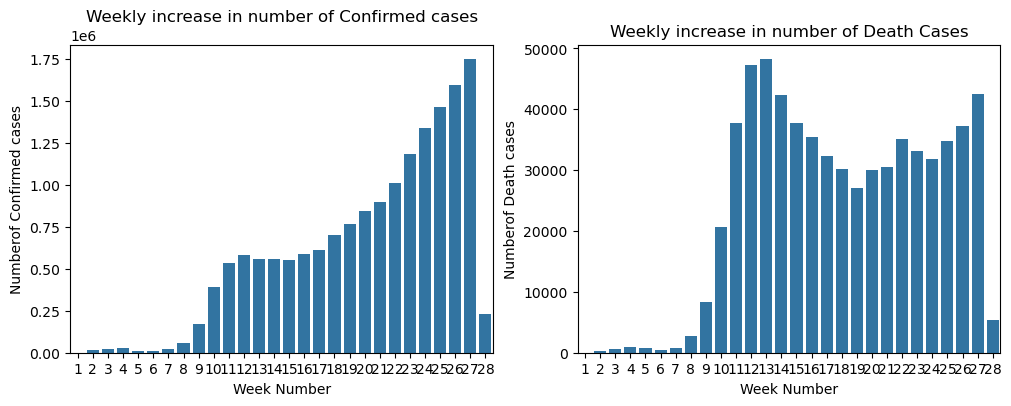

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 87659.0
Average increase in number of Recovered cases everyday: 50362.0
Average increase in number of Death cases everyday: 3479.0


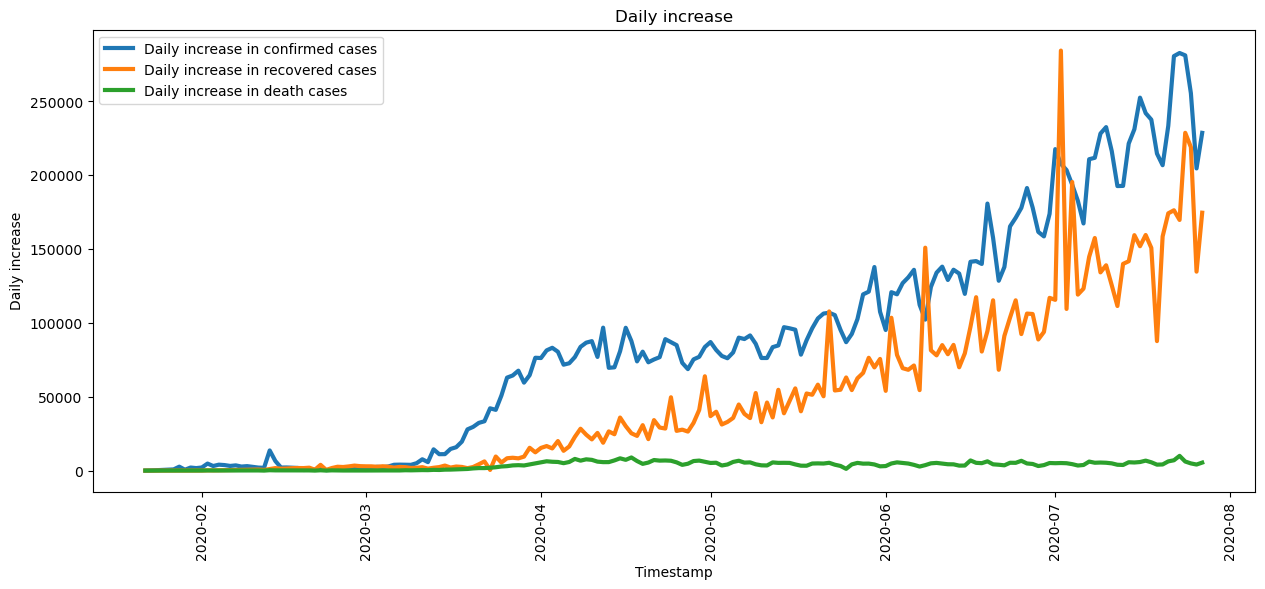

In [17]:
print("Average increase in number of Confirmed cases everyday:",np.round(df["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(df["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(df["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(df["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(df["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(df["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

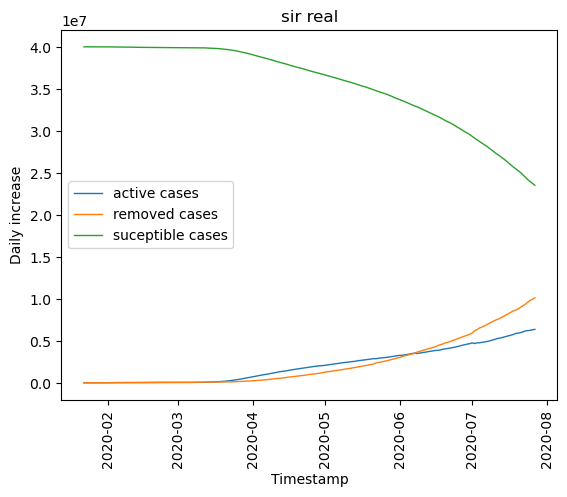

In [18]:
plt.plot(df["Active"].fillna(0),label="active cases",linewidth=1)
plt.plot(df["removed"].fillna(0),label="removed cases",linewidth=1)
plt.plot(df["Suceptible"].fillna(0),label="suceptible cases",linewidth=1)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("sir real")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [19]:
#Data Anlaysis for lebanon
lebanon_data = covid[covid["Country/Region"]=="Lebanon"]
datewise_lebanon = lebanon_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_lebanon.iloc[-1])
print("Total Active Cases",datewise_lebanon["Confirmed"].iloc[-1]-datewise_lebanon["Recovered"].iloc[-1]-datewise_lebanon["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_lebanon["Recovered"].iloc[-1]+datewise_lebanon["Deaths"].iloc[-1])

Confirmed    3882
Recovered    1709
Deaths         51
Name: 2020-07-27 00:00:00, dtype: int64
Total Active Cases 2122
Total Closed Cases 1760


In [20]:
datewise_lebanon

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-07-23,3260,1619,43
2020-07-24,3407,1666,46
2020-07-25,3582,1671,47


In [21]:
#Tnleb population of leb
Tnleb=10000
datewise_lebanon["active"]=(datewise_lebanon["Confirmed"]-datewise_lebanon["Deaths"]-datewise_lebanon["Recovered"])/Tnleb
datewise_lebanon["removed"]=(datewise_lebanon["Deaths"]+datewise_lebanon["Recovered"])/Tnleb

datewise_lebanon["suceptible"]=(Tnleb-datewise_lebanon["Confirmed"])/Tnleb
datewise_lebanon


,Confirmed,Recovered,Deaths,active,removed,suceptible
Date,,,,,,
2020-01-22,0,0,0,0.0000,0.0000,1.0000
2020-01-23,0,0,0,0.0000,0.0000,1.0000
2020-01-24,0,0,0,0.0000,0.0000,1.0000
2020-01-25,0,0,0,0.0000,0.0000,1.0000
2020-01-26,0,0,0,0.0000,0.0000,1.0000
...,...,...,...,...,...,...
2020-07-23,3260,1619,43,0.1598,0.1662,0.6740
2020-07-24,3407,1666,46,0.1695,0.1712,0.6593
2020-07-25,3582,1671,47,0.1864,0.1718,0.6418


Text(0.5, 1.0, 'Weekly Progress of different types of cases LEBANON')

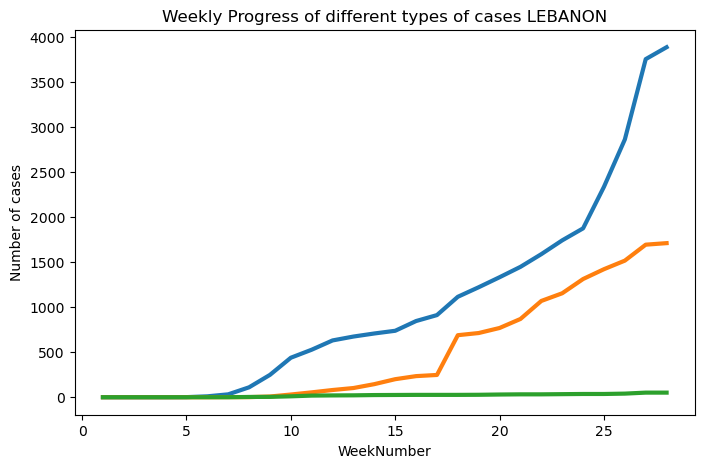

In [22]:
datewise_lebanon["WeekofYear"] = datewise.index.to_series().dt.isocalendar().week
week_num_lebanon = []
lebanon_weekwise_confirmed = []
lebanon_weekwise_recovered = []
lebanon_weekwise_deaths = []
lebanon_weekwise_active = []
lebanon_weekwise_removed = []
lebanon_weekwise_suceptible = []
w = 1     
for i in list(datewise_lebanon["WeekofYear"].unique()):
    lebanon_weekwise_confirmed.append(datewise_lebanon[datewise_lebanon["WeekofYear"]==i]["Confirmed"].iloc[-1])
    lebanon_weekwise_recovered.append(datewise_lebanon[datewise_lebanon["WeekofYear"]==i]["Recovered"].iloc[-1])
    lebanon_weekwise_deaths.append(datewise_lebanon[datewise_lebanon["WeekofYear"]==i]["Deaths"].iloc[-1])
    lebanon_weekwise_active.append(datewise_lebanon[datewise_lebanon["WeekofYear"]==i]["active"].iloc[-1])
    lebanon_weekwise_removed.append(datewise_lebanon[datewise_lebanon["WeekofYear"]==i]["removed"].iloc[-1])

    lebanon_weekwise_suceptible.append(datewise_lebanon[datewise_lebanon["WeekofYear"]==i]["suceptible"].iloc[-1])


    week_num_lebanon.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_lebanon,lebanon_weekwise_confirmed,linewidth=3)
plt.plot(week_num_lebanon,lebanon_weekwise_recovered,linewidth =3)
plt.plot(week_num_lebanon,lebanon_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases LEBANON")

Text(0.5, 1.0, 'Weekly Progress of different types of cases LEBANON')

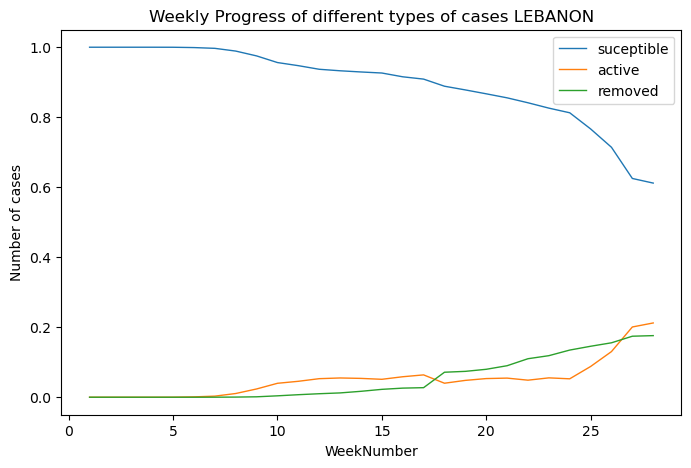

In [23]:
plt.figure(figsize=(8,5))
plt.plot(week_num_lebanon,lebanon_weekwise_suceptible,linewidth=1,label='suceptible')
plt.plot(week_num_lebanon,lebanon_weekwise_active,linewidth =1,label='active')
plt.plot(week_num_lebanon,lebanon_weekwise_removed,linewidth = 1,label='removed')
plt.legend()
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases LEBANON")

In [24]:
datewise_lebanon["Days Since"]=datewise_lebanon.index-datewise_lebanon.index[0]
datewise_lebanon["Days Since"] = datewise_lebanon["Days Since"].dt.days
datewise_lebanon

,Confirmed,Recovered,Deaths,active,removed,suceptible,WeekofYear,Days Since
Date,,,,,,,,
2020-01-22,0,0,0,0.0000,0.0000,1.0000,4,0
2020-01-23,0,0,0,0.0000,0.0000,1.0000,4,1
2020-01-24,0,0,0,0.0000,0.0000,1.0000,4,2
2020-01-25,0,0,0,0.0000,0.0000,1.0000,4,3
2020-01-26,0,0,0,0.0000,0.0000,1.0000,4,4
...,...,...,...,...,...,...,...,...
2020-07-23,3260,1619,43,0.1598,0.1662,0.6740,30,183
2020-07-24,3407,1666,46,0.1695,0.1712,0.6593,30,184
2020-07-25,3582,1671,47,0.1864,0.1718,0.6418,30,185


In [25]:
df["Days Since"]=df.index-datewise.index[0]
df["Days Since"] = df["Days Since"].dt.days
df

,Confirmed,Recovered,Deaths,Active,removed,Suceptible,WeekofYear,Days Since
Date,,,,,,,,
2020-01-22,555,28,17,510,45,39999445,4,0
2020-01-23,654,30,18,606,48,39999346,4,1
2020-01-24,941,36,26,879,62,39999059,4,2
2020-01-25,1434,39,42,1353,81,39998566,4,3
2020-01-26,2118,52,56,2010,108,39997882,4,4
...,...,...,...,...,...,...,...,...
2020-07-23,15510481,8710969,633506,6166006,9344475,24489519,30,183
2020-07-24,15791645,8939705,639650,6212290,9579355,24208355,30,184
2020-07-25,16047190,9158743,644517,6243930,9803260,23952810,30,185


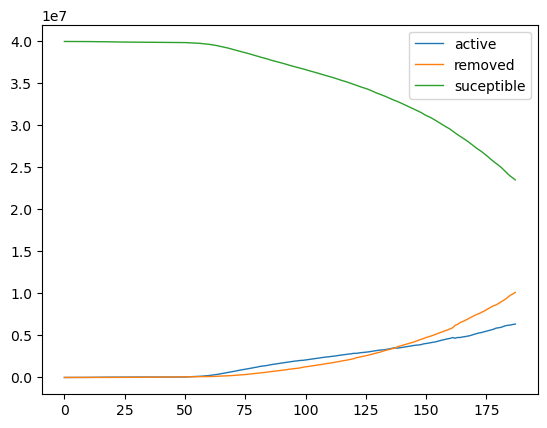

In [26]:
plt.plot(df["Days Since"],df["Active"],linewidth = 1,label="active")
plt.plot(df["Days Since"],df["removed"],linewidth = 1,label="removed")
plt.plot(df["Days Since"],df["Suceptible"],linewidth = 1,label="suceptible")
plt.legend()
plt.show()

In [27]:
np.array(datewise_lebanon["suceptible"])



array([1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9999, 0.9999,
       0.9999, 0.9999, 0.9999, 0.9998, 0.9998, 0.9998, 0.9996, 0.999 ,
       0.9987, 0.9987, 0.9987, 0.9984, 0.9978, 0.9978, 0.9968, 0.9968,
       0.9959, 0.9939, 0.9939, 0.9923, 0.9907, 0.989 , 0.989 , 0.988 ,
       0.9867, 0.9843, 0.9837, 0.9813, 0.9752, 0.9733, 0.9682, 0.9667,
       0.9632, 0.9609, 0.9588, 0.9562, 0.9554, 0.953 , 0.9521, 0.9506,
       0.9492, 0.948 , 0.9473, 0.9459, 0.9452, 0.9424, 0.9418, 0.9391,
       0.9381, 0.937 , 0.9368, 0.9359, 0.9342, 0.9337, 0.9332, 0.9328,
       0.9327, 0.9323, 0.9323, 0.9318, 0.9312, 0.9304, 0.9296, 0.9293,
       0.929 , 0.9283, 0.9279, 0.9275, 0.9271, 0.9267, 0.9263, 0.926 ,
       0.9259, 0.925 , 0.9216, 0.9204, 0.9191, 0.9155, 0.9141, 0.913 ,
      

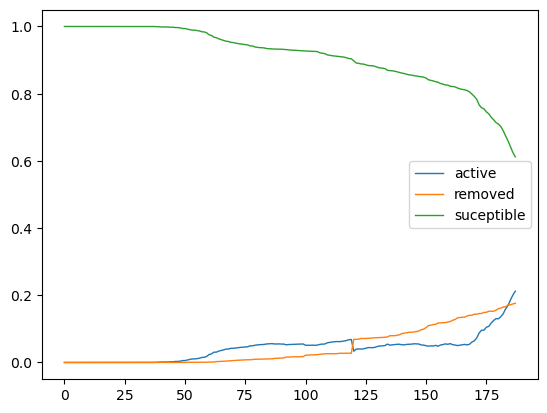

In [28]:
plt.plot(datewise_lebanon["Days Since"],datewise_lebanon["active"],linewidth = 1,label='active')
plt.plot(datewise_lebanon["Days Since"],datewise_lebanon["removed"],linewidth = 1,label='removed')
plt.plot(datewise_lebanon["Days Since"],datewise_lebanon["suceptible"],linewidth = 1,label='suceptible')

plt.legend()
plt.show()

In [29]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [30]:
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [31]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(188): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

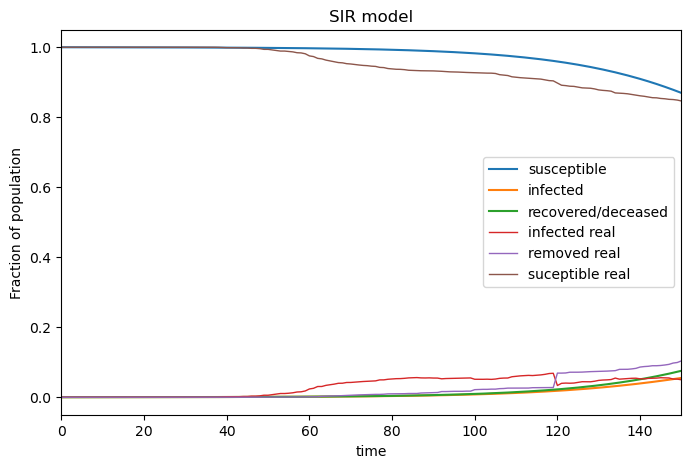

In [32]:
N = 10000
b0 = 0
beta = 0.9604397
gamma =  0.51866597
hs = 0.1
#Fitted parameters: [0.9604397  0.51866597]

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, label='susceptible');
plt.plot(inf, label='infected');
plt.plot(rec, label='recovered/deceased');
plt.plot(datewise_lebanon["Days Since"],datewise_lebanon["active"],linewidth = 1,label='infected real')
plt.plot(datewise_lebanon["Days Since"],datewise_lebanon["removed"],linewidth = 1,label='removed real')
plt.plot(datewise_lebanon["Days Since"],datewise_lebanon["suceptible"],linewidth = 1,label='suceptible real')
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.xlim(0,150)
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')

plt.savefig('SIR_example.png')
plt.show()

In [33]:
import numpy as np
from scipy.optimize import curve_fit

In [34]:
len(sus)

188

In [35]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [36]:
y1=np.array(datewise_lebanon["suceptible"])
y2=np.array(datewise_lebanon["active"])
y3=np.array(datewise_lebanon["removed"])

y_data = np.concatenate((y1, y2, y3))

In [37]:
import numpy as np
from scipy.optimize import curve_fit







def fit_function(x, beta, gamma):
    N = 10000  # Provide the appropriate value for N
    b0 = 0  # Provide the appropriate value for b0
    hs = 0.1  # Provide the appropriate value for hs
    return np.concatenate(SIR(N, b0, beta, gamma, hs))


initial_guess = [0.1, 0.1]  # Initial parameter guess
params, params_covariance = curve_fit(fit_function, None, y_data, p0=initial_guess)


print("Fitted parameters:", params)


/tmp/ipykernel_301/3058724573.py:3: RuntimeWarning: overflow encountered in scalar multiply
  fa = -beta*a*b
/tmp/ipykernel_301/3058724573.py:8: RuntimeWarning: overflow encountered in scalar multiply
  fb = beta*a*b - gamma*b


Fitted parameters: [0.9604397  0.51866597]


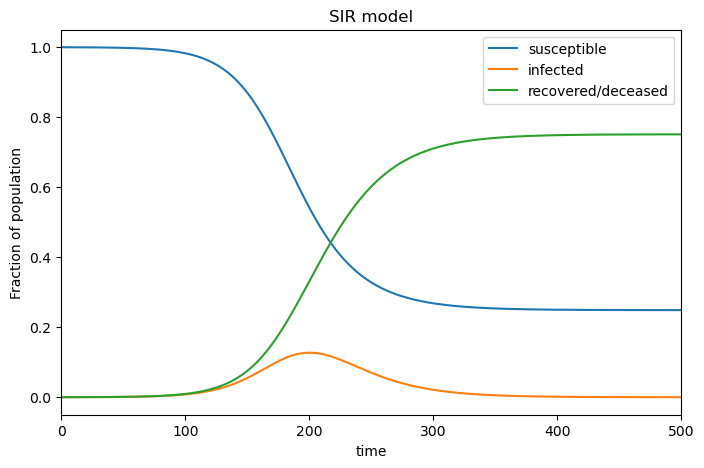

In [38]:
def SIR1(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(1000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec


N = 10000
b0 = 0
beta = 0.9604397
gamma =  0.51866597
hs = 0.1
#Fitted parameters: [0.9604397  0.51866597]

sus, inf, rec = SIR1(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, label='susceptible');
plt.plot(inf, label='infected');
plt.plot(rec, label='recovered/deceased');

plt.title("SIR model")
plt.xlabel("time", fontsize=10);

plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,500)
plt.savefig('SIR_example.png')
plt.show()

In [39]:
world=df

In [40]:
world["removed"]=world["removed"]/Tn
world["Active"]=world["Active"]/Tn
world["Suceptible"]=world["Suceptible"]/Tn

In [41]:
world

,Confirmed,Recovered,Deaths,Active,removed,Suceptible,WeekofYear,Days Since
Date,,,,,,,,
2020-01-22,555,28,17,0.000013,0.000001,0.999986,4,0
2020-01-23,654,30,18,0.000015,0.000001,0.999984,4,1
2020-01-24,941,36,26,0.000022,0.000002,0.999976,4,2
2020-01-25,1434,39,42,0.000034,0.000002,0.999964,4,3
2020-01-26,2118,52,56,0.000050,0.000003,0.999947,4,4
...,...,...,...,...,...,...,...,...
2020-07-23,15510481,8710969,633506,0.154150,0.233612,0.612238,30,183
2020-07-24,15791645,8939705,639650,0.155307,0.239484,0.605209,30,184
2020-07-25,16047190,9158743,644517,0.156098,0.245082,0.598820,30,185


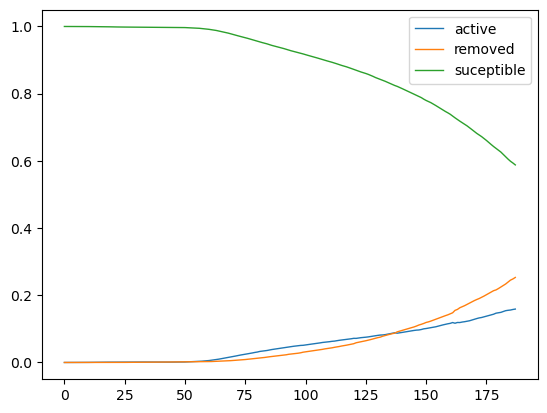

In [42]:
plt.plot(df["Days Since"],df["Active"],linewidth = 1,label="active")
plt.plot(df["Days Since"],df["removed"],linewidth = 1,label="removed")
plt.plot(df["Days Since"],df["Suceptible"],linewidth = 1,label="suceptible")
plt.legend()
plt.show()

In [43]:
yy1=np.array(world["Suceptible"])
yy2=np.array(world["Active"])
yy3=np.array(world["removed"])

yy_data = np.concatenate((yy1, yy2, yy3))

In [44]:
import numpy as np
from scipy.optimize import curve_fit




# Concatenate the arrays


# Define the function to fit
def fit_function(x, beta, gamma):
    N = 40000000  # Provide the appropriate value for N
    b0 = 0  # Provide the appropriate value for b0
    hs = 0.1  # Provide the appropriate value for hs
    return np.concatenate(SIR(N, b0, beta, gamma, hs))

# Fit the data to the function
initial_guess = [0.1, 0.1]  # Initial parameter guess
params, params_covariance = curve_fit(fit_function, None, yy_data, p0=initial_guess)

# Print the fitted parameters
print("Fitted parameters:", params)


/tmp/ipykernel_301/3058724573.py:3: RuntimeWarning: overflow encountered in scalar multiply
  fa = -beta*a*b
/tmp/ipykernel_301/3058724573.py:8: RuntimeWarning: overflow encountered in scalar multiply
  fb = beta*a*b - gamma*b


Fitted parameters: [2.20531766 1.25824143]


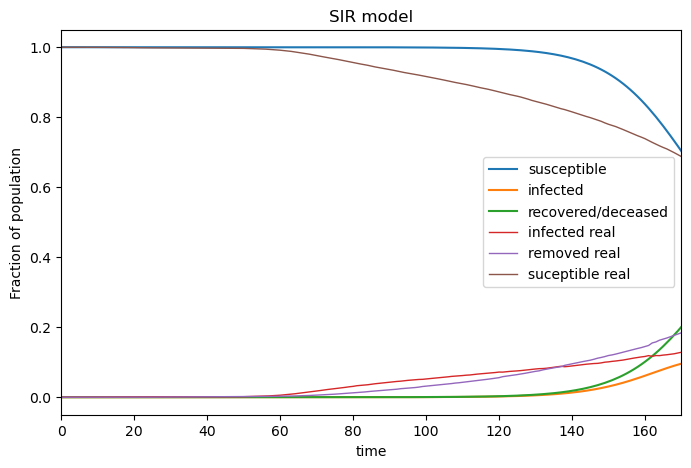

In [45]:
N = 40000000
b0 = 0
beta = 2.20531766
gamma =  1.25824143
hs = 0.1
#Fitted parameters: [0.9604397  0.51866597]

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, label='susceptible');
plt.plot(inf, label='infected');
plt.plot(rec, label='recovered/deceased');
plt.plot(world["Days Since"],world["Active"],linewidth = 1,label='infected real')
plt.plot(world["Days Since"],world["removed"],linewidth = 1,label='removed real')
plt.plot(world["Days Since"],world["Suceptible"],linewidth = 1,label='suceptible real')
plt.title("SIR model")
plt.xlim(0,170)
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')

plt.savefig('SIR_example.png')
plt.show()

In [46]:
conda env export > environment.yml



Note: you may need to restart the kernel to use updated packages.


In [47]:
import sys
print(sys.version)


3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]


In [48]:
print(sys.executable)


/home/karl/miniconda3/envs/COVID/bin/python


In [49]:
print(sys.version)
print(sys.platform)

3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]
linux
